In [2]:
import pandas as pd
df=pd.read_csv("../data/benin-malanville.csv")
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [3]:
missing_values=df.isna().sum()
percent_missing=(missing_values/len(df))*100
missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    '% of Total': percent_missing
})
missing_report[missing_report['% of Total'] > 5]


,Missing Values,% of Total
Comments,525600,100.0


In [4]:
from scipy.stats import zscore

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols_to_check].apply(zscore)

# Identify rows with Z-score > 3 or < -3
outliers = (z_scores.abs() > 3)
df_outliers = df[outliers.any(axis=1)]
print(df_outliers)

               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670     2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672     2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673     2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
525141  2022-08-08 16:22     4.6   -0.1    4.6     6.1     5.9  21.9  99.0   
525142  2022-08-08 16:23     4.6    0.2    4.6     5.9     5.8  21.9  99.0   
525143  2022-08-08 16:24     4.5   -0.1    4.5     5.8     5.7  21.9  99.0   
525151  2022-08-08 16:32     4.7   -0.1    4.8     6.0     5.9  22.0  99.1   
525155  2022-08-08 16:36     4.8    0.0    4.9     6.0     5.9  22.0  99.1   

         WS  WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Pr

In [5]:
# Impute missing values in key columns with median
for col in cols_to_check:
 df[col] = df[col].fillna(df[col].median())


# Drop rows if Timestamp or target values are missing
df.dropna(subset=['Timestamp', 'GHI', 'DNI', 'DHI'], inplace=True)

In [7]:
df.to_csv("../data/benin-malanville_clean.csv", index=False)

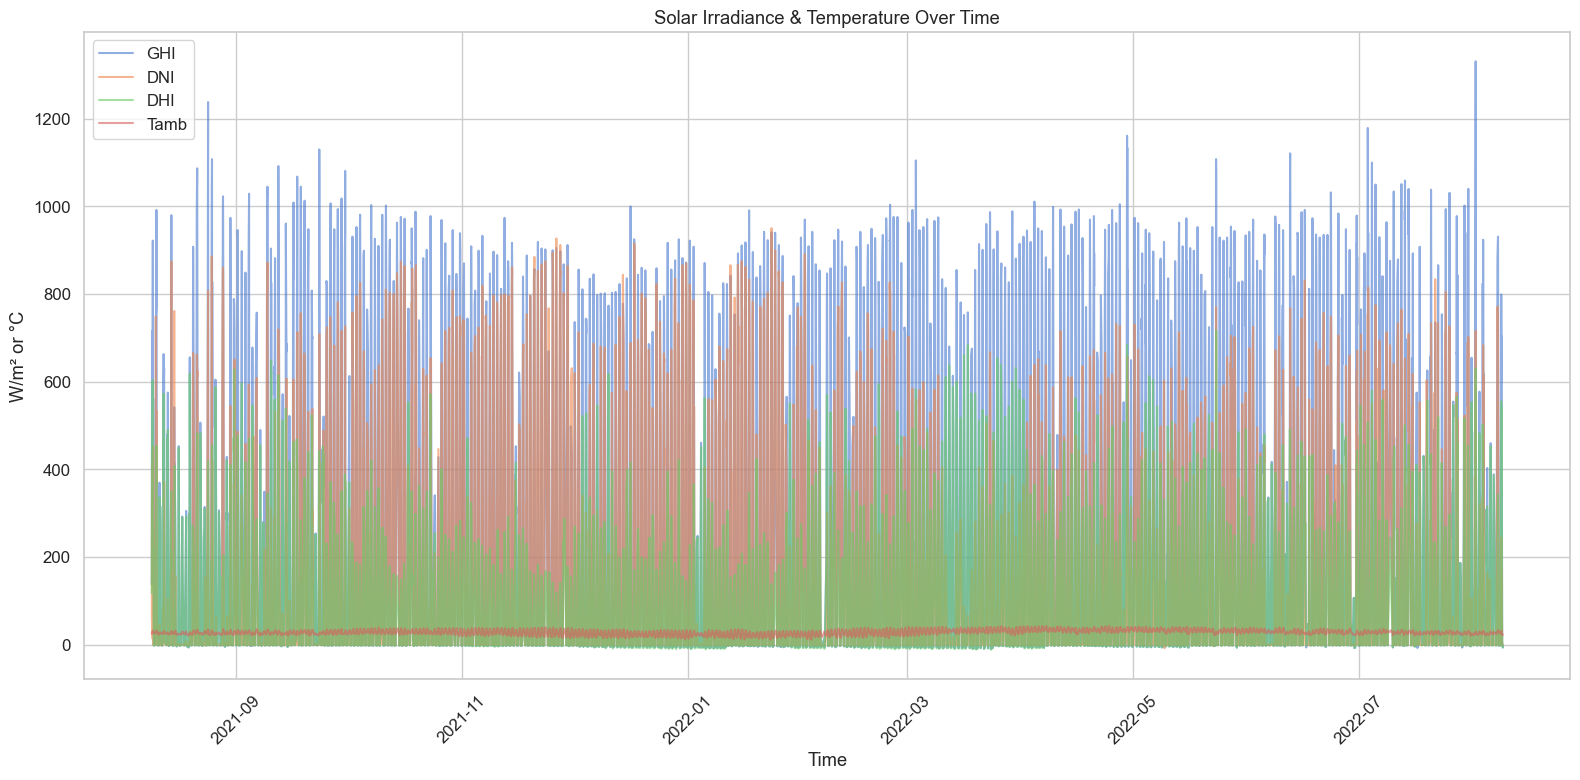

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Plot GHI, DNI, DHI, Tamb over time (use a sample for performance)
sample_df = df.sample(5000).sort_values('Timestamp')

plt.figure(figsize=(16, 8))
plt.plot(sample_df['Timestamp'], sample_df['GHI'], label='GHI', alpha=0.6)
plt.plot(sample_df['Timestamp'], sample_df['DNI'], label='DNI', alpha=0.6)
plt.plot(sample_df['Timestamp'], sample_df['DHI'], label='DHI', alpha=0.6)
plt.plot(sample_df['Timestamp'], sample_df['Tamb'], label='Tamb', alpha=0.6)
plt.legend()
plt.title('Solar Irradiance & Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('W/m² or °C')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

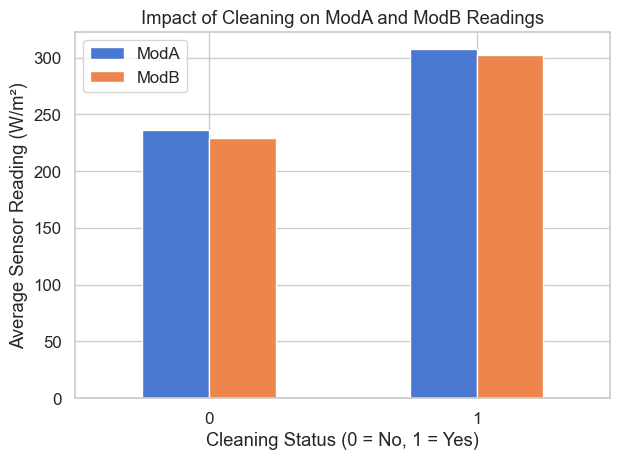

In [7]:
# Group by Cleaning status and compute average ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Bar plot of average ModA and ModB by Cleaning status
plt.figure(figsize=(10, 5))
cleaning_impact.plot(x='Cleaning', kind='bar', legend=True)
plt.title('Impact of Cleaning on ModA and ModB Readings')
plt.xlabel('Cleaning Status (0 = No, 1 = Yes)')
plt.ylabel('Average Sensor Reading (W/m²)')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

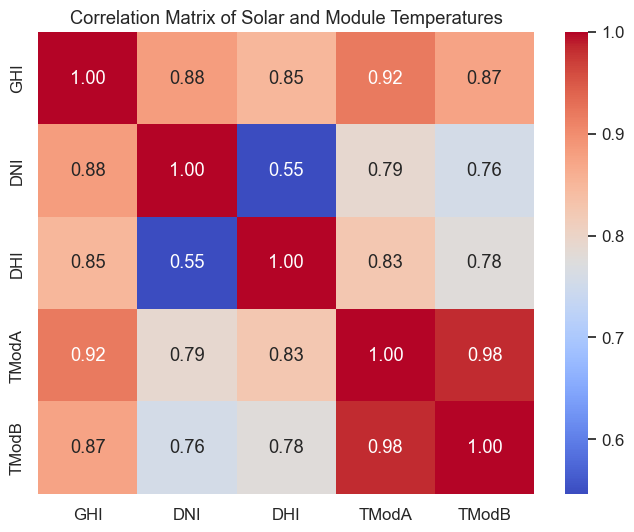

In [8]:
correlation_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Solar and Module Temperatures")
plt.show()

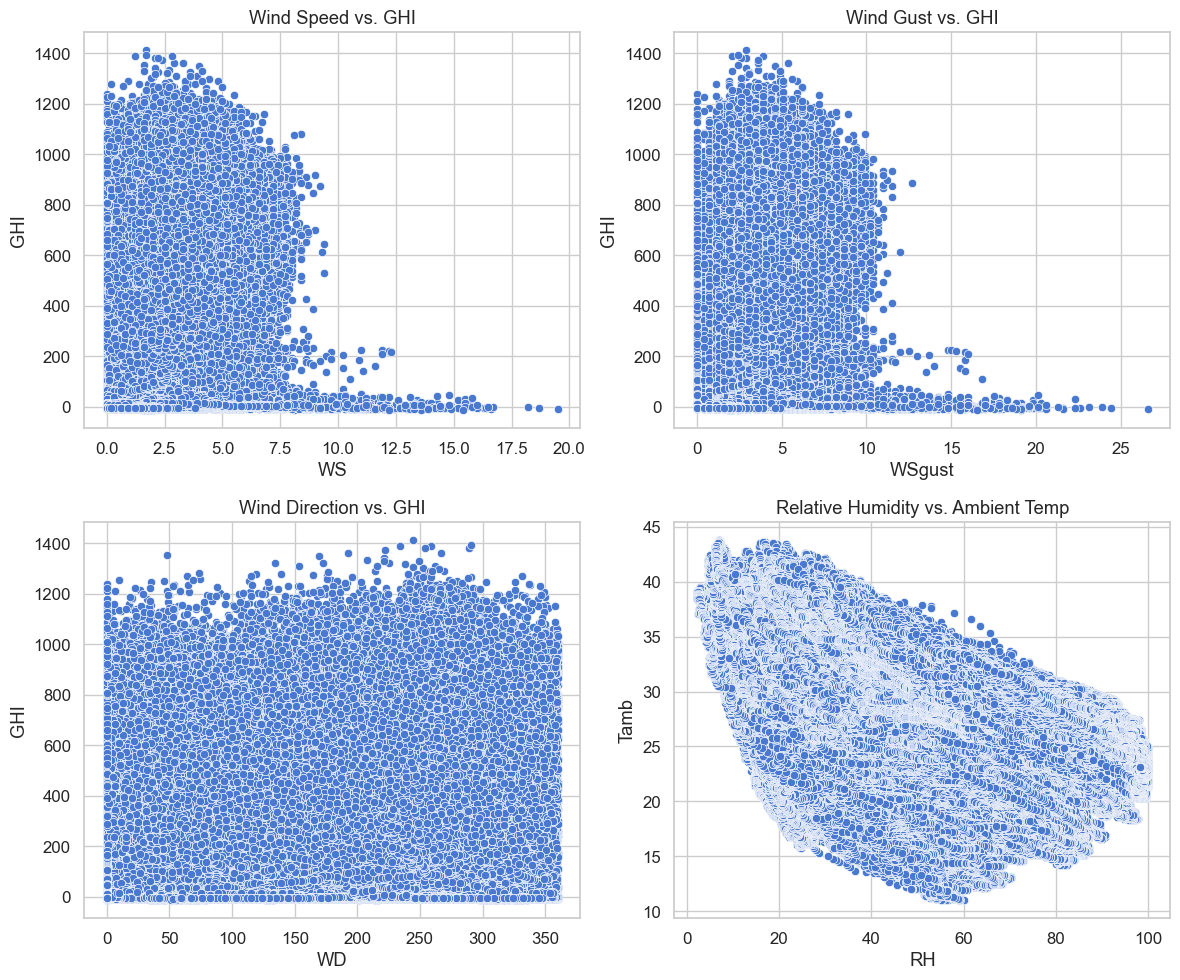

In [9]:
# Scatter plots to examine environmental factors vs GHI
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=df, x='WS', y='GHI', ax=axs[0, 0])
axs[0, 0].set_title('Wind Speed vs. GHI')

sns.scatterplot(data=df, x='WSgust', y='GHI', ax=axs[0, 1])
axs[0, 1].set_title('Wind Gust vs. GHI')

sns.scatterplot(data=df, x='WD', y='GHI', ax=axs[1, 0])
axs[1, 0].set_title('Wind Direction vs. GHI')

sns.scatterplot(data=df, x='RH', y='Tamb', ax=axs[1, 1])
axs[1, 1].set_title('Relative Humidity vs. Ambient Temp')

plt.tight_layout()
plt.show()

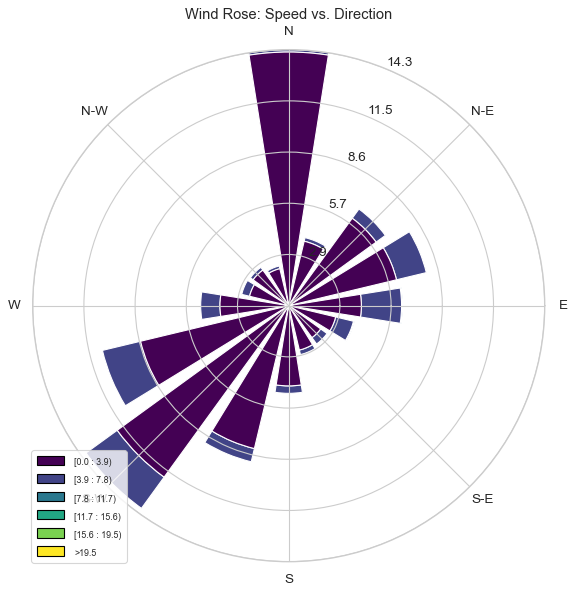

In [10]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from windrose import WindroseAxes

# Clean data: drop NaNs
wind_data = df.dropna(subset=['WS', 'WD'])

ax = WindroseAxes.from_ax()
ax.bar(wind_data['WD'], wind_data['WS'], normed=True, opening=0.8, edgecolor='white', cmap=plt.cm.viridis)
ax.set_legend()
plt.title("Wind Rose: Speed vs. Direction")
plt.show()

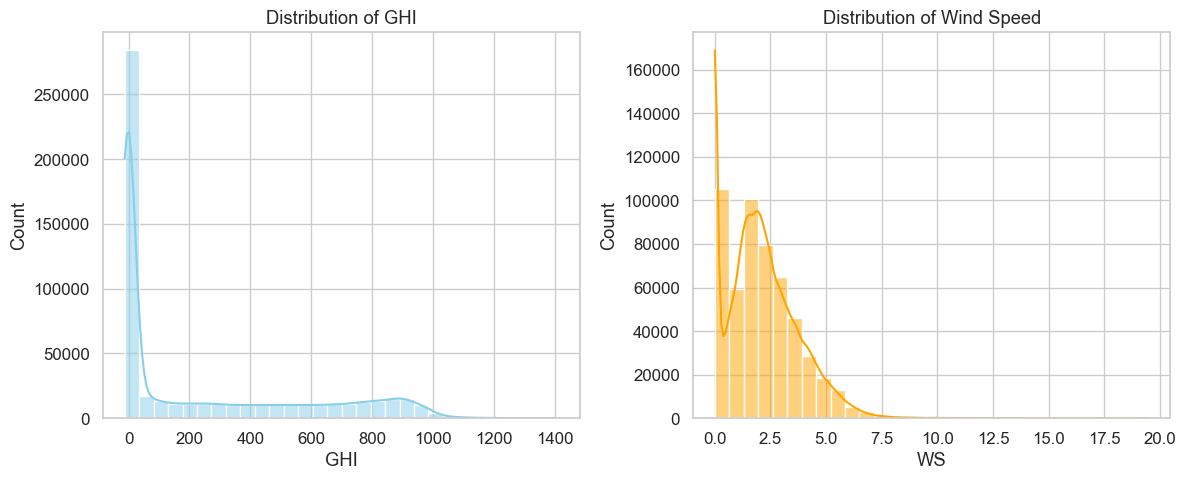

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['GHI'], bins=30, kde=True, ax=axs[0], color="skyblue")
axs[0].set_title("Distribution of GHI")

sns.histplot(df['WS'], bins=30, kde=True, ax=axs[1], color="orange")
axs[1].set_title("Distribution of Wind Speed")

plt.tight_layout()
plt.show()

In [12]:
df_daylight = df[df['GHI'] > 0].copy()

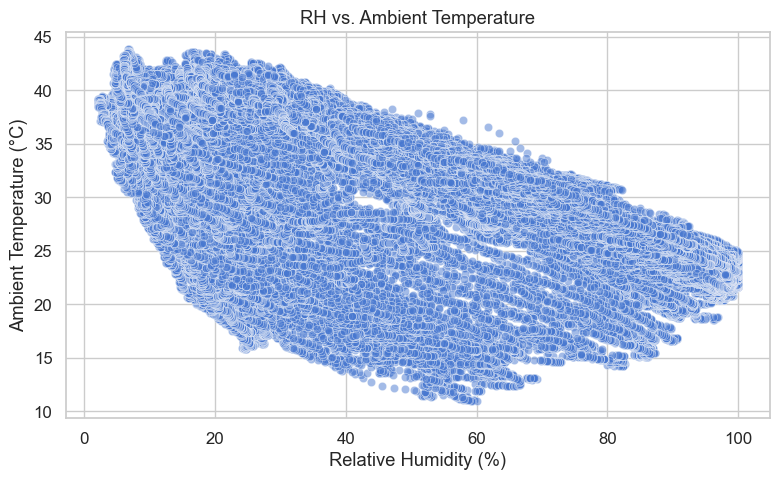

In [ ]:
# RH vs Tamb
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_daylight, x='RH', y='Tamb', alpha=0.5)
plt.title('RH vs. Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.tight_layout()
plt.show()

# Bubble chart: GHI vs Tamb, bubble size = RH
plt.figure(figsize=(10, 6))
plt.scatter(df_daylight['GHI'], df_daylight['Tamb'], s=df_daylight['RH'], alpha=0.3, c='green')
plt.title('GHI vs Tamb with RH as Bubble Size')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (°C)')
plt.tight_layout()
plt.show()